**Objective :**

***The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables***


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
solar_data=pd.read_csv('solarpowergeneration.csv')
solar_data.head().style.background_gradient(cmap='rainbow')


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.500000,0,10.000000,75,8.000000,29.820000,0
1,0.628535,69,28,7.500000,0,10.000000,77,5.000000,29.850000,0
2,0.397172,69,28,7.500000,0,10.000000,70,0.000000,29.890000,5418
3,0.165810,69,28,7.500000,0,10.000000,33,0.000000,29.910000,25477
4,0.065553,69,28,7.500000,0,10.000000,21,3.000000,29.890000,30069


In [4]:
solar_data.describe().style.background_gradient(cmap='rainbow')

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [5]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
solar_data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [7]:
numerical_columns = solar_data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    solar_data[col].fillna(solar_data[col].median(), inplace=True)

C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_8236\133531411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solar_data[col].fillna(solar_data[col].median(), inplace=True)
C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_8236\133531411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [8]:
solar_data.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

distance-to-solar-noon
Skew : 0.21


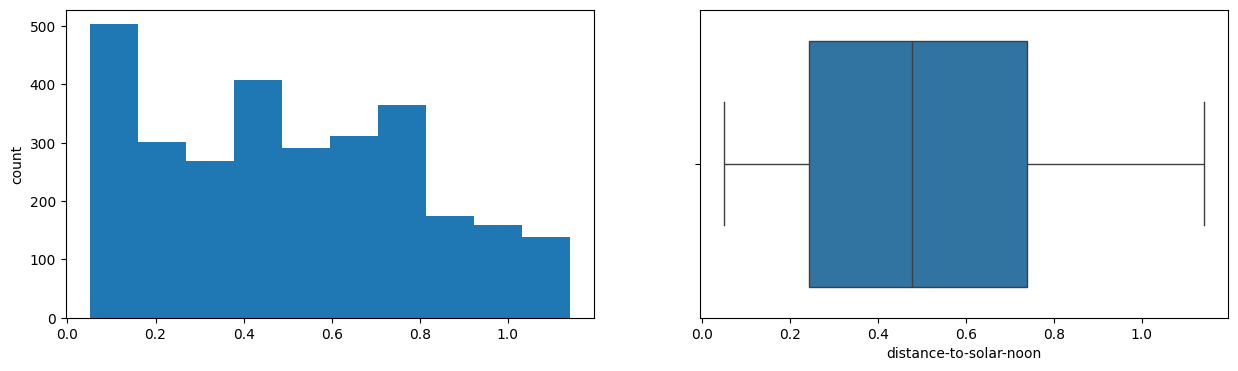

temperature
Skew : 0.13


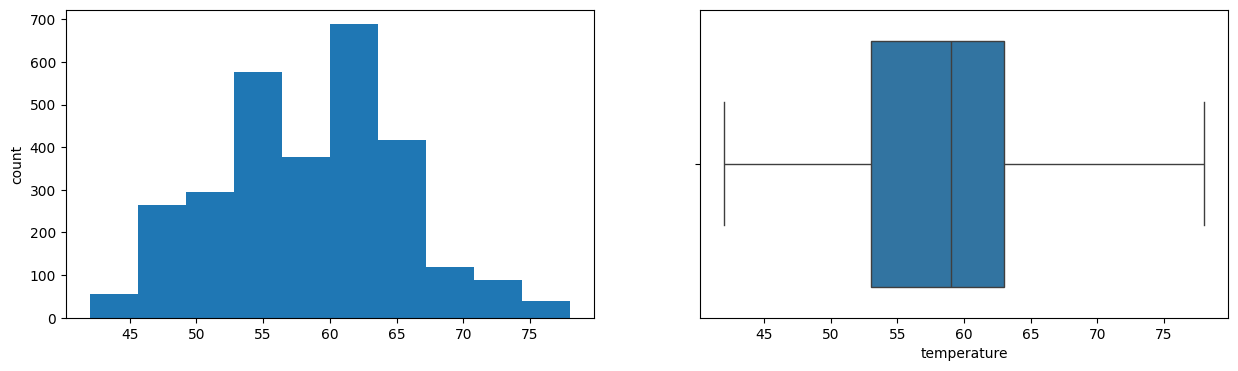

wind-direction
Skew : -1.63


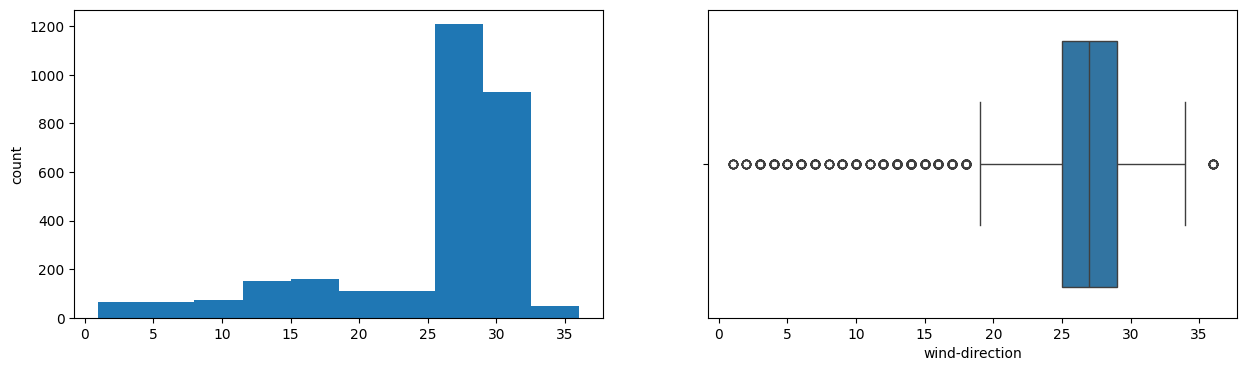

wind-speed
Skew : 0.42


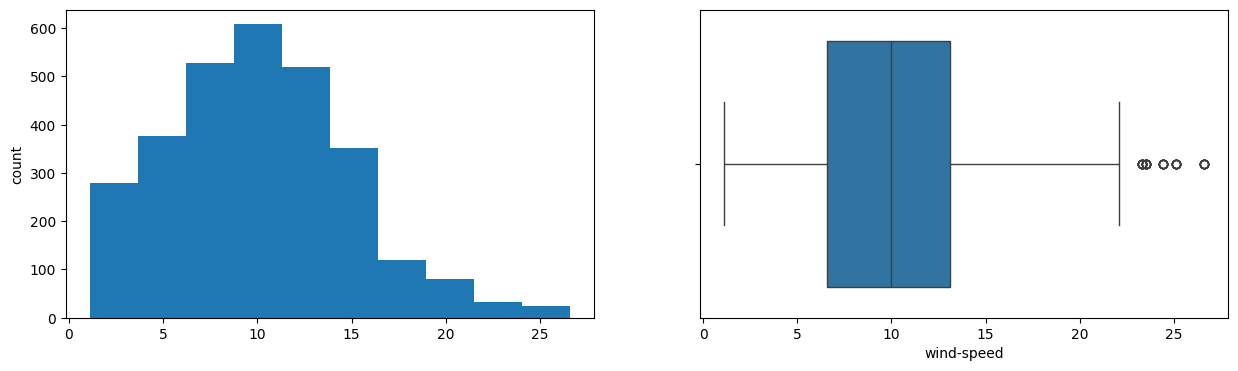

sky-cover
Skew : 0.08


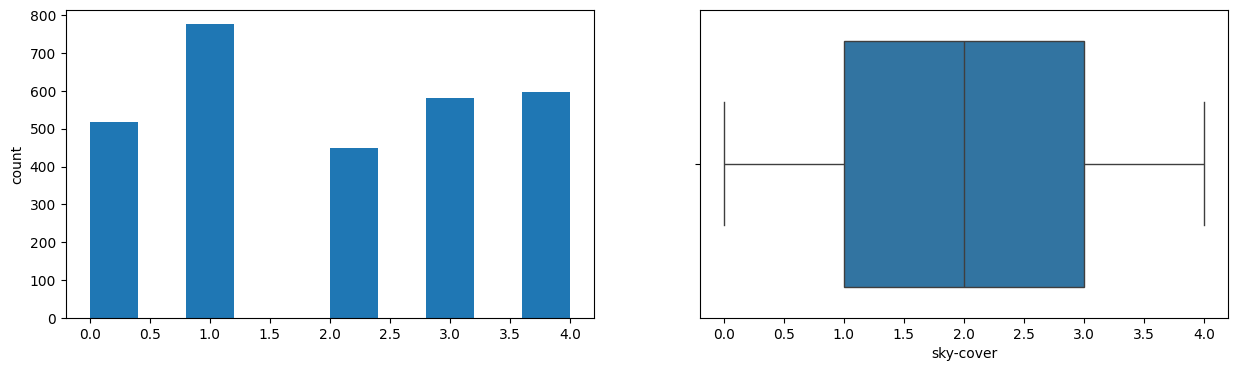

visibility
Skew : -3.86


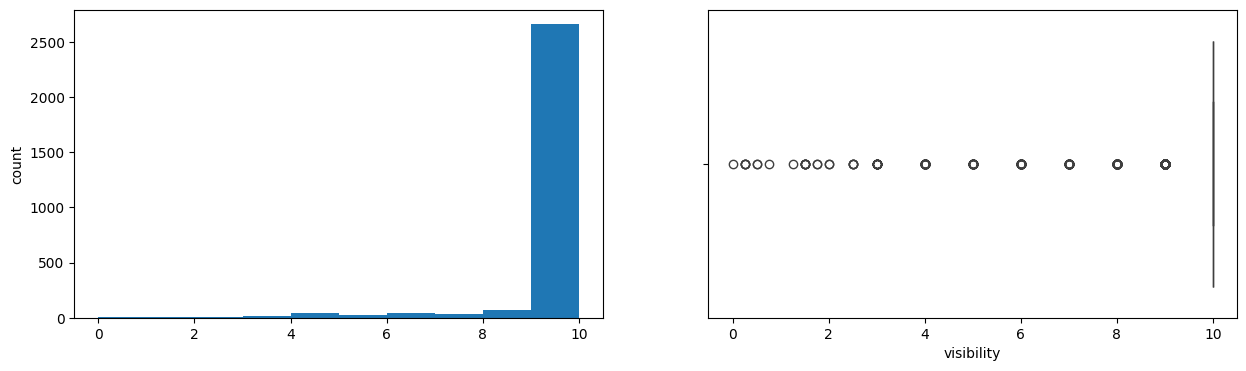

humidity
Skew : -0.96


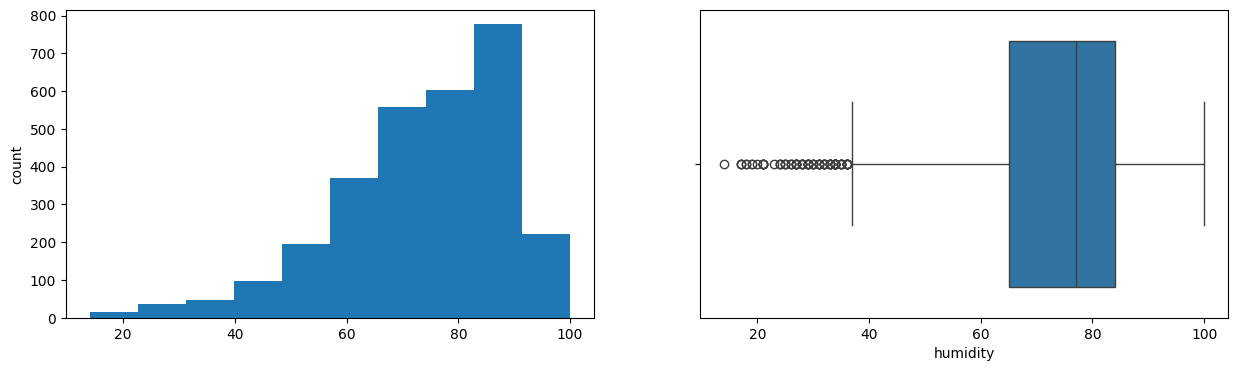

average-wind-speed-(period)
Skew : 0.62


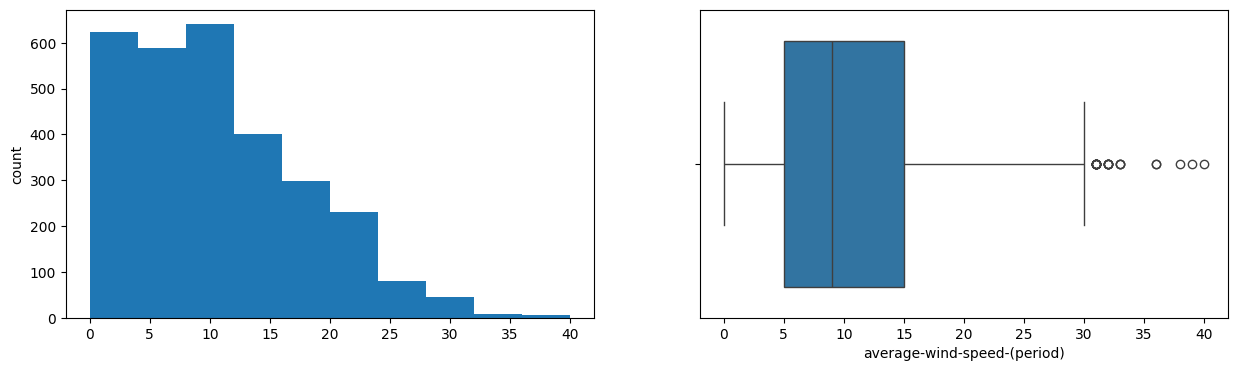

average-pressure-(period)
Skew : 0.44


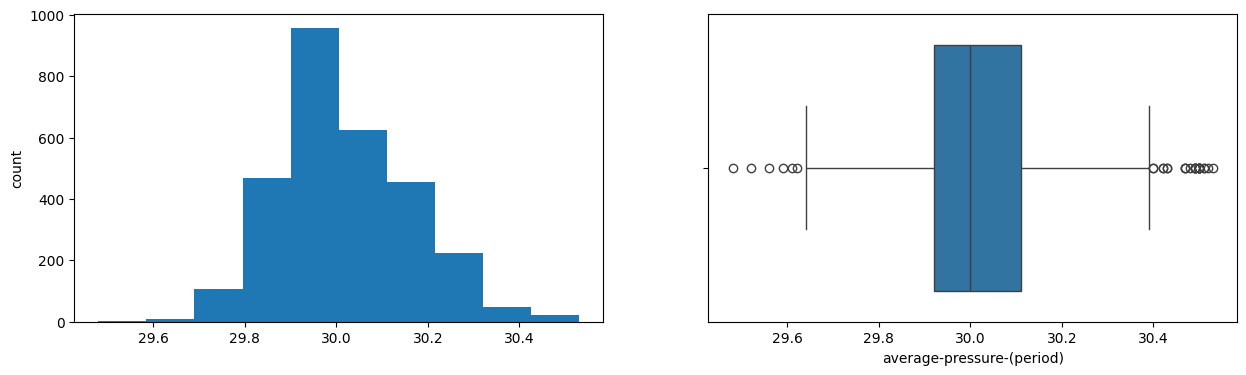

power-generated
Skew : 1.31


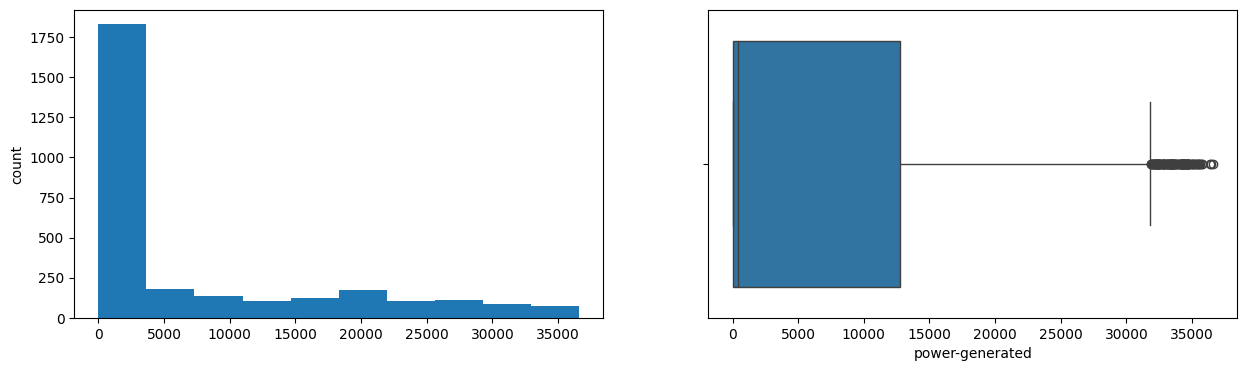

In [9]:
num_cols = solar_data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Skew :', round(solar_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    solar_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=solar_data[col])
    plt.show()

In [10]:
# Using quantile_transformer for reducing Skewness
# solar_data=pd.read_csv('solarpowergeneration.csv')
num_cols = solar_data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
    solar_data[col] = quantile_transformer.fit_transform(solar_data[col].values.reshape(-1, 1)).flatten()
    print(f"Skewness after Quantile Transformation for {col}: {solar_data[col].skew():.5f}")    


Skewness after Quantile Transformation for distance-to-solar-noon: 0.00018
Skewness after Quantile Transformation for temperature: 0.00402
Skewness after Quantile Transformation for wind-direction: 0.24235
Skewness after Quantile Transformation for wind-speed: 0.00089
Skewness after Quantile Transformation for sky-cover: 0.00220
Skewness after Quantile Transformation for visibility: -2.02041
Skewness after Quantile Transformation for humidity: 0.31333
Skewness after Quantile Transformation for average-wind-speed-(period): -1.54332
Skewness after Quantile Transformation for average-pressure-(period): -0.00467
Skewness after Quantile Transformation for power-generated: -0.11362


In [11]:
# solar_data=pd.read_csv('solarpowergeneration.csv')
# num_cols = solar_data.select_dtypes(include=np.number).columns.tolist()
# for col in num_cols:
#     solar_data[col] = np.sqrt(solar_data[col])
#     print(f"Skewness after Square Root Transformation for {col}: {solar_data[col].skew():.5f}")


In [12]:
# solar_data=pd.read_csv('solarpowergeneration.csv')
# num_cols = solar_data.select_dtypes(include=np.number).columns.tolist()
# for col in num_cols:
#     solar_data[col] = np.log(solar_data[col])
#     print(f"Skewness after Log Transformation for {col}: {solar_data[col].skew():.5f}")


distance-to-solar-noon
Skew : 0.0


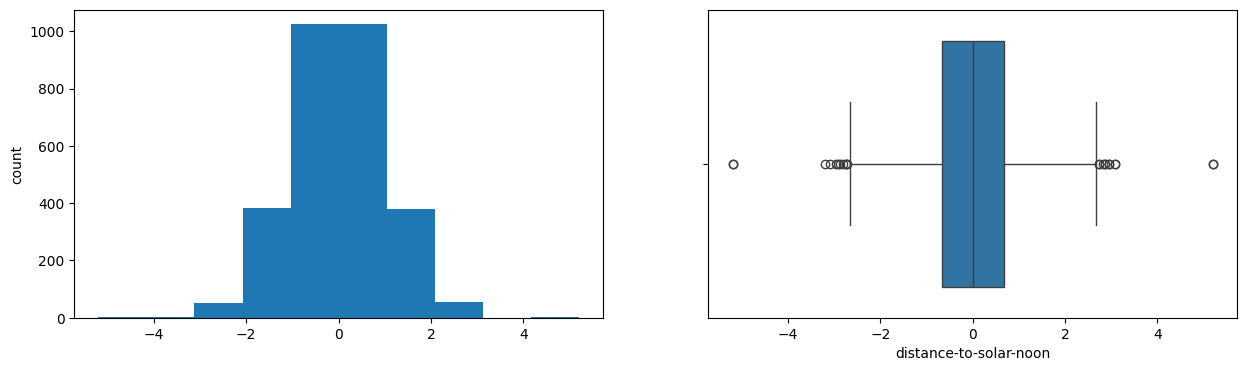

temperature
Skew : 0.0


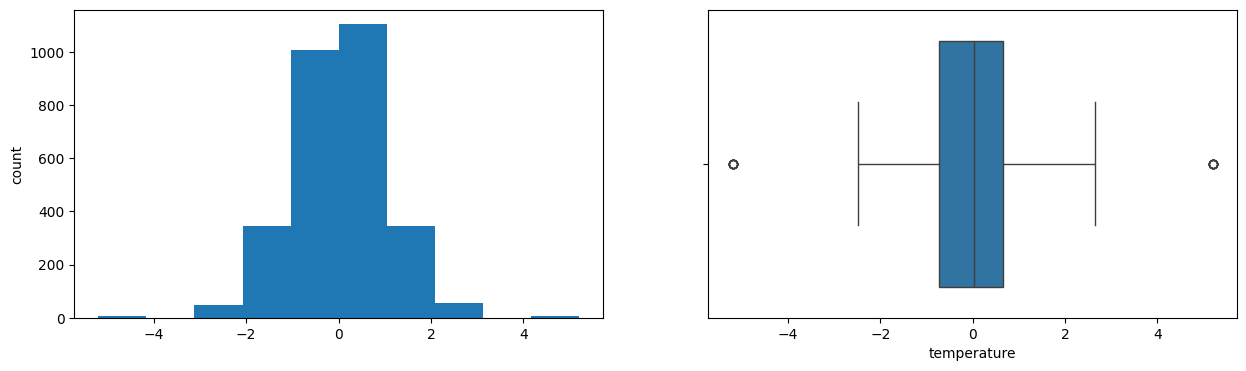

wind-direction
Skew : 0.24


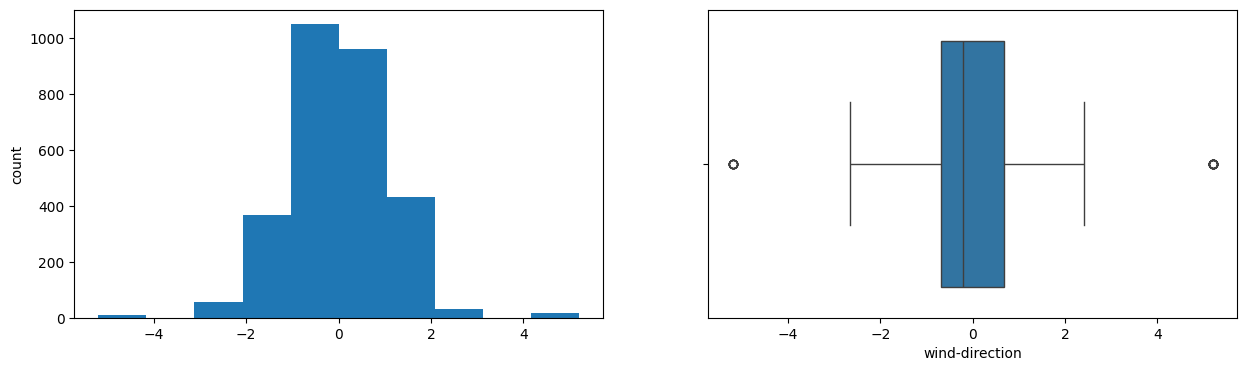

wind-speed
Skew : 0.0


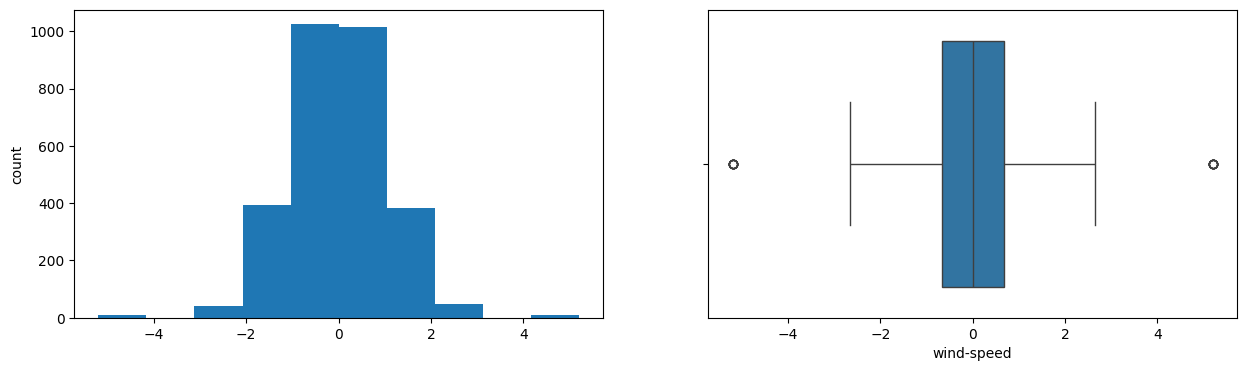

sky-cover
Skew : 0.0


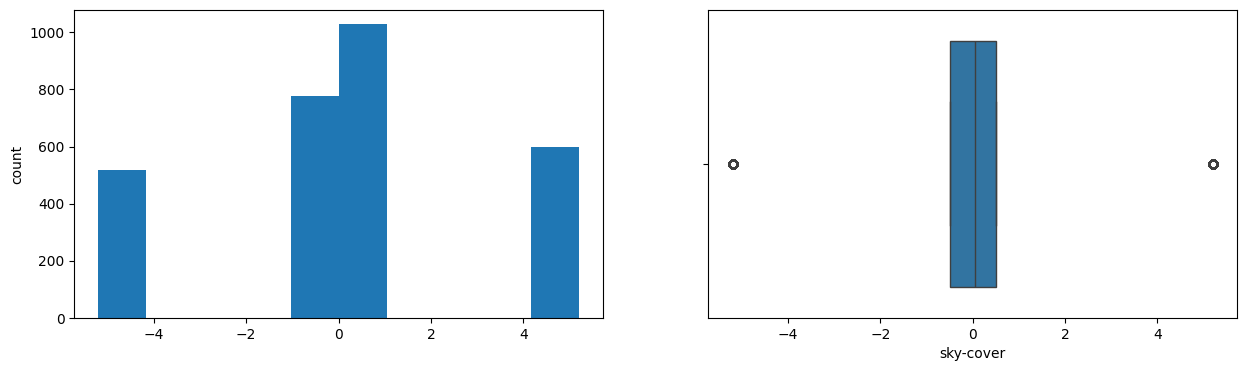

visibility
Skew : -2.02


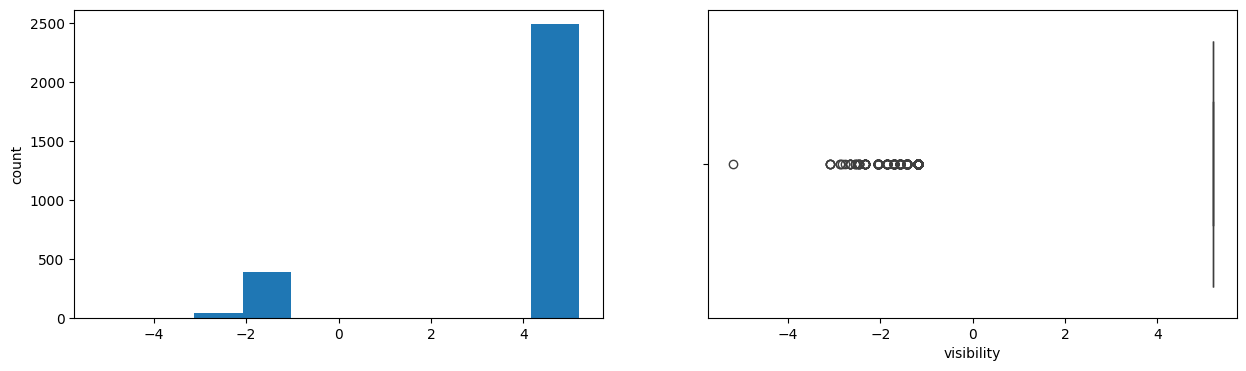

humidity
Skew : 0.31


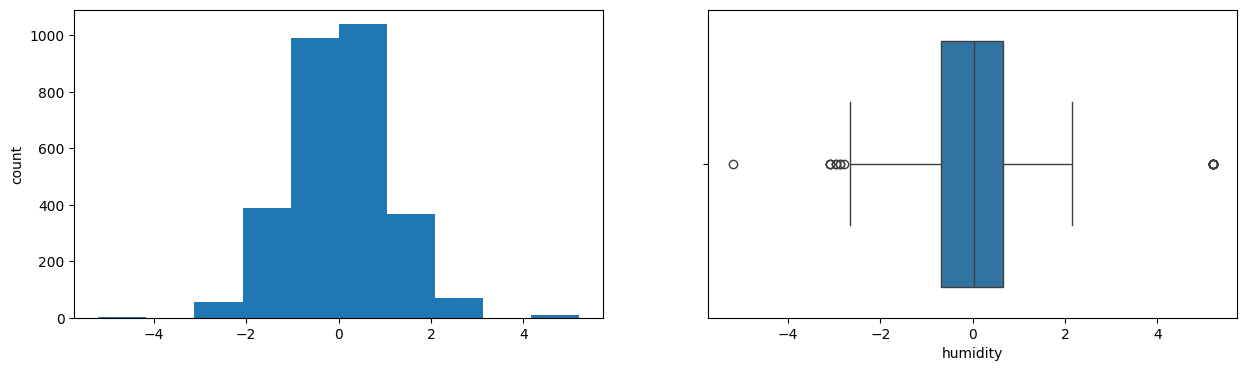

average-wind-speed-(period)
Skew : -1.54


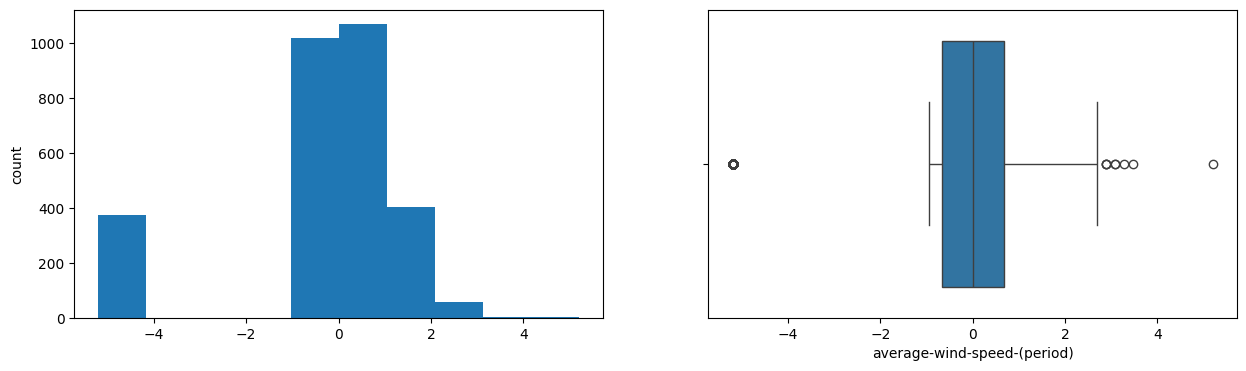

average-pressure-(period)
Skew : -0.0


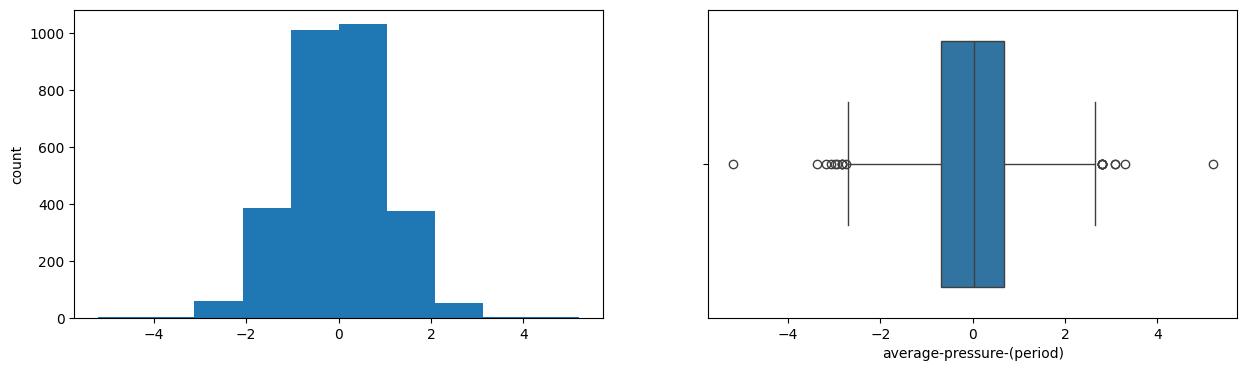

power-generated
Skew : -0.11


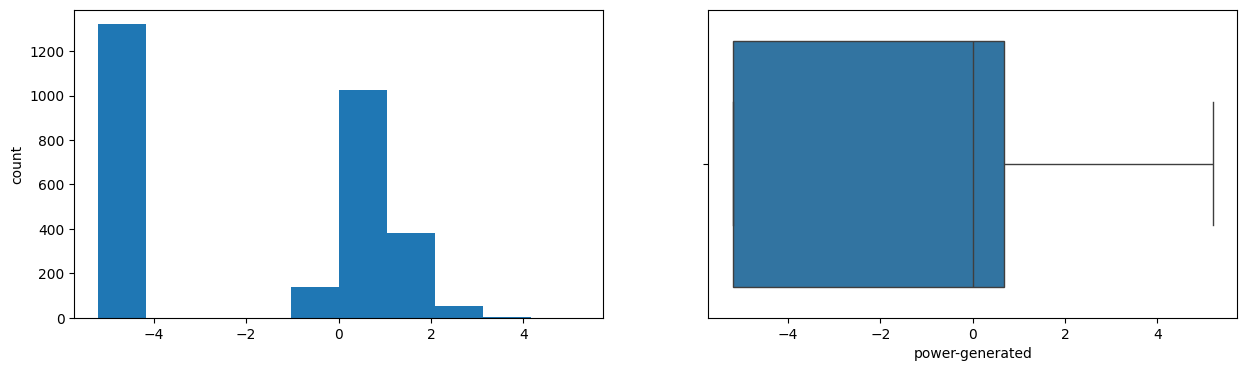

In [13]:
#After Transformation
for col in num_cols:
    print(col)
    print('Skew :', round(solar_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    solar_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=solar_data[col])
    plt.show()

##################################################################################################################

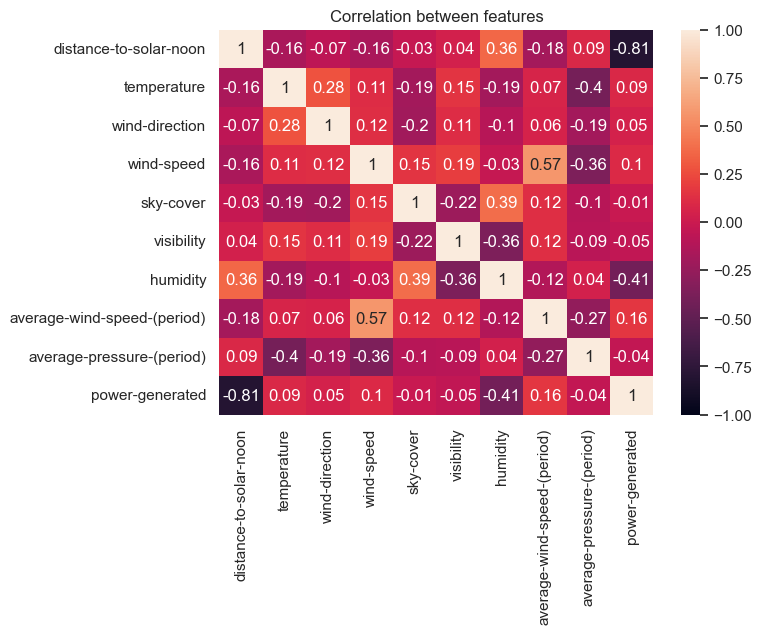

In [14]:
# correlation between features
sns.set()
_, ax = plt.subplots(figsize=(7, 5))

# plot the heatmap of correlations
fig = sns.heatmap(solar_data.corr().round(2), annot=True, vmin=-1, vmax=1, ax=ax);

# set the title
fig.set_title("Correlation between features");

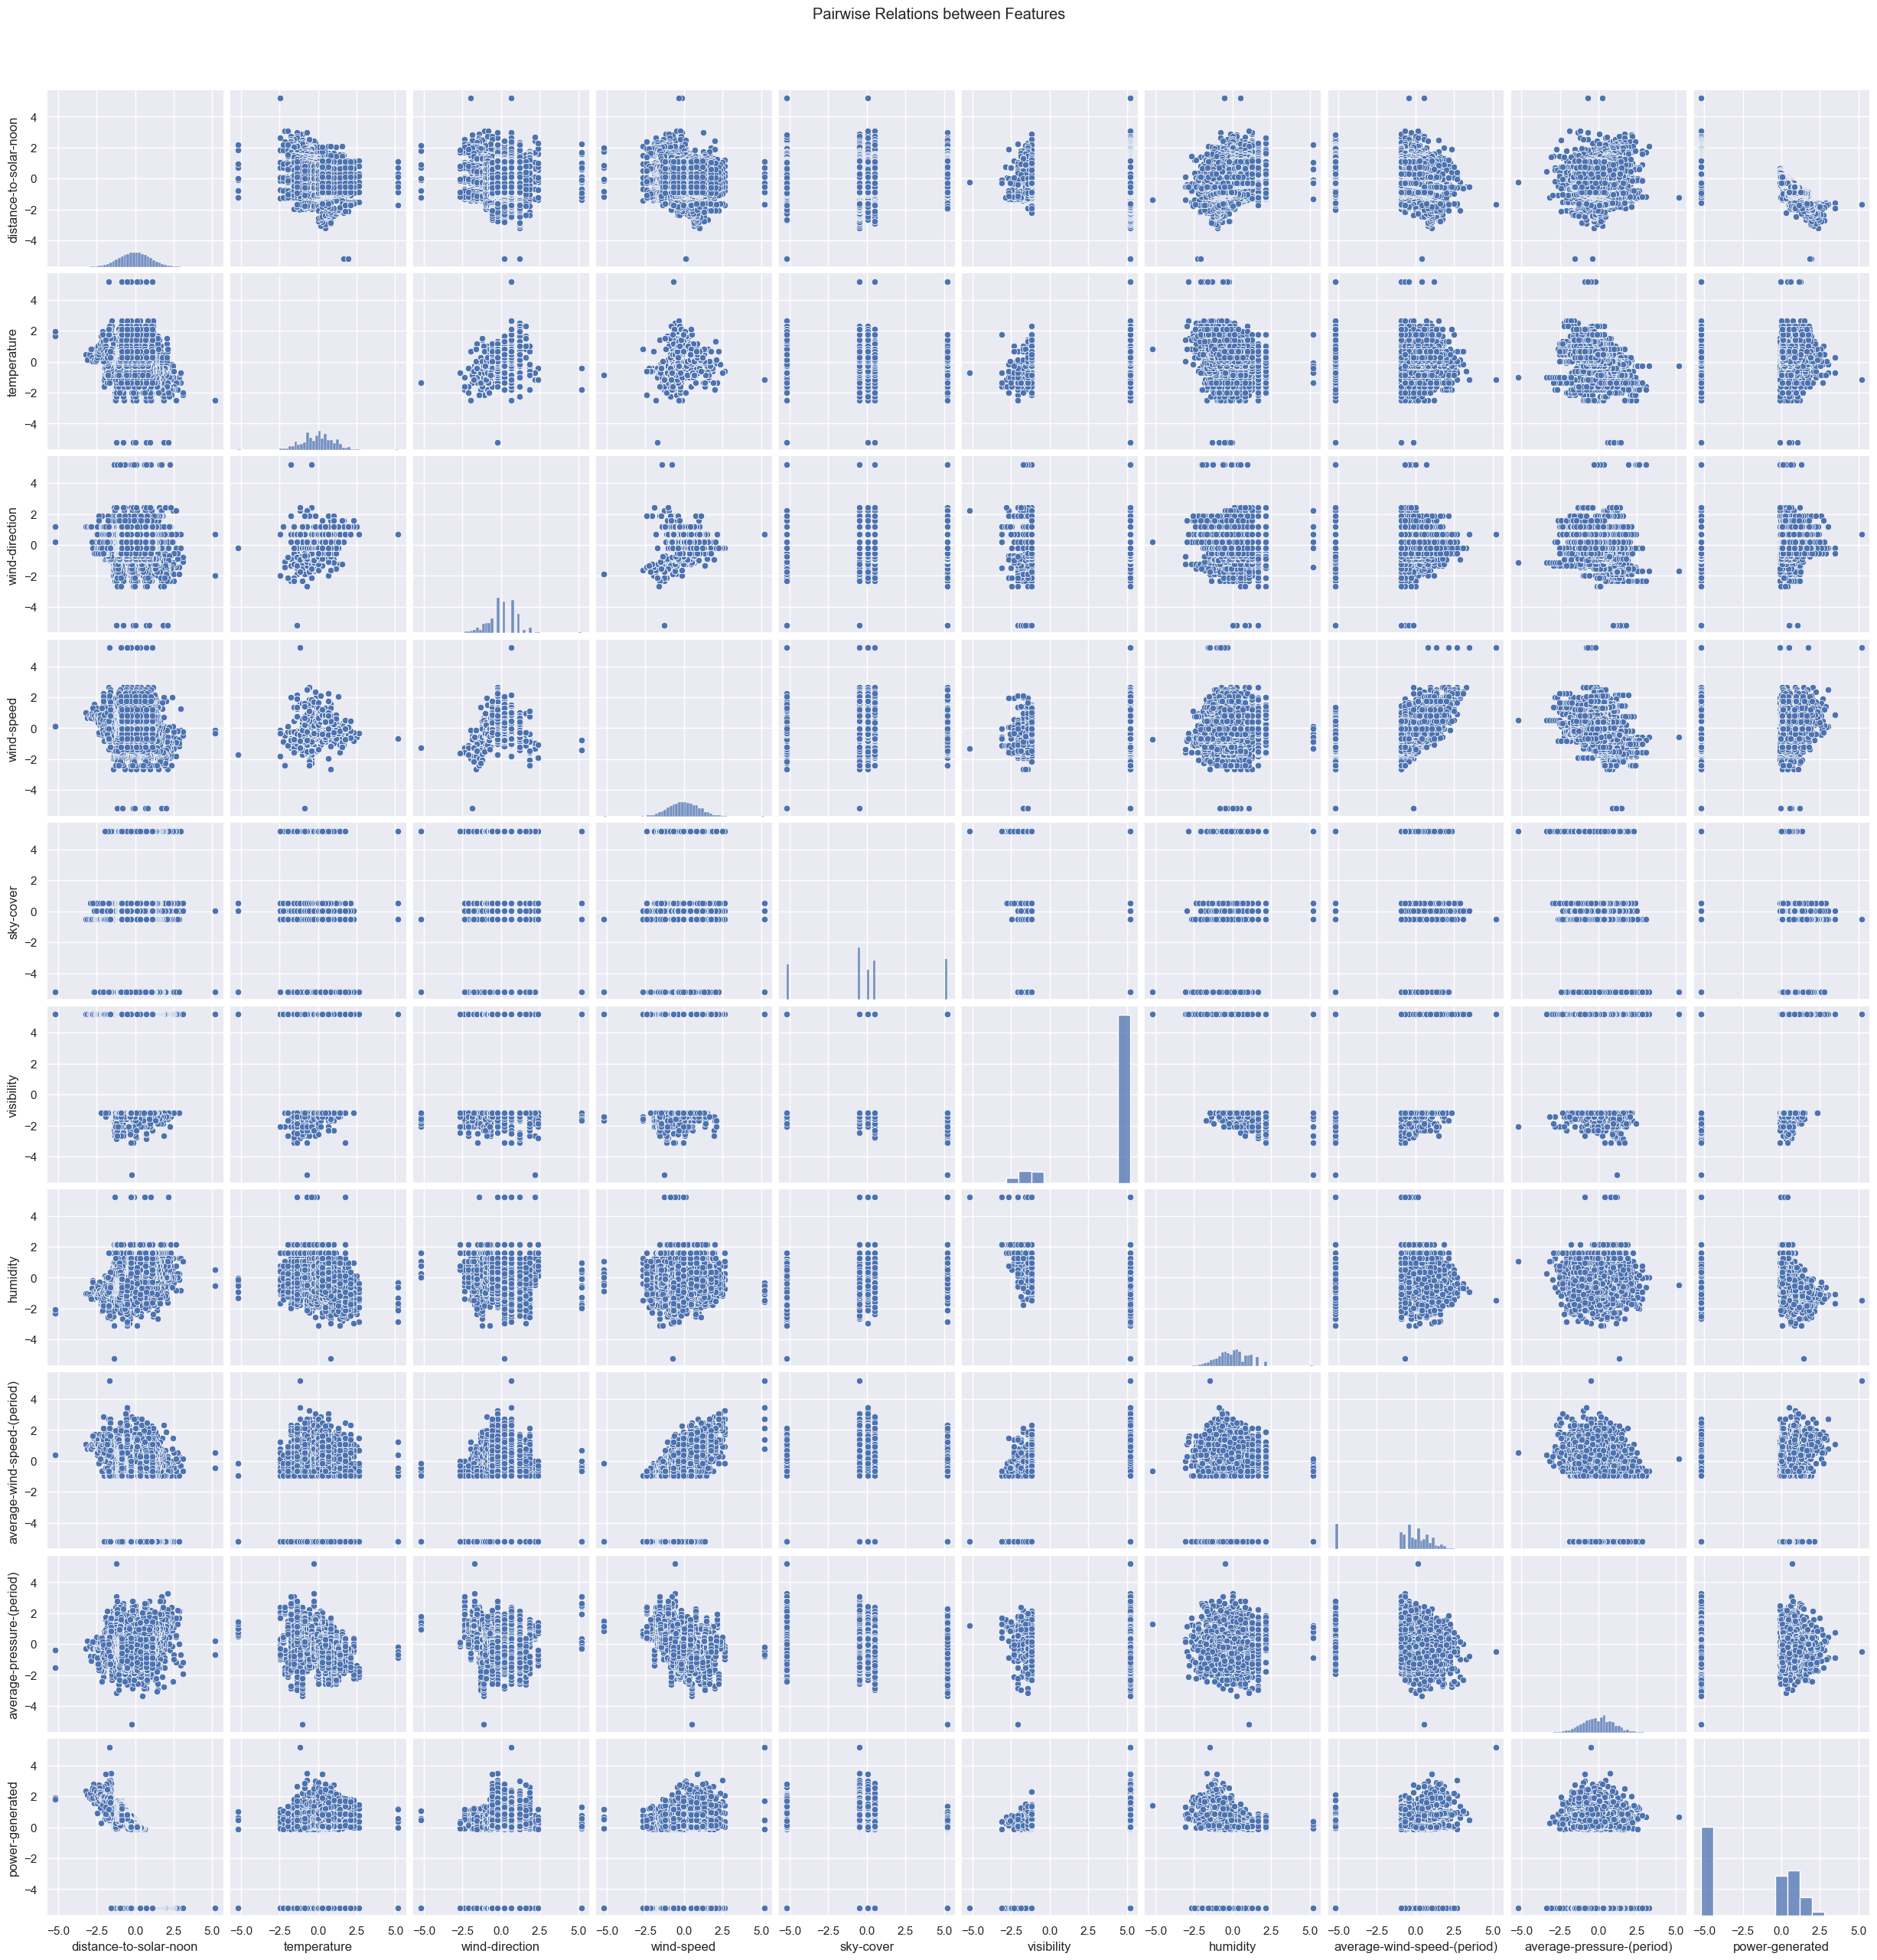

In [15]:
# plot pairwise relationships of the dataset
sns.set()  # set the seaborn's theme as default
g = sns.pairplot(solar_data);

# set the title
g.fig.suptitle("Pairwise Relations between Features", y=1.03);

In [16]:
def plot(variable):
    plt.figure(figsize=(15,5))
    plt.plot(solar_data[variable])
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with plot ".format(variable)) 

In [17]:
def plot_hist(variable):
    plt.figure(figsize=(15,5))
    sns.histplot(solar_data[variable], kde=True, color='purple')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.axvline(solar_data[variable].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

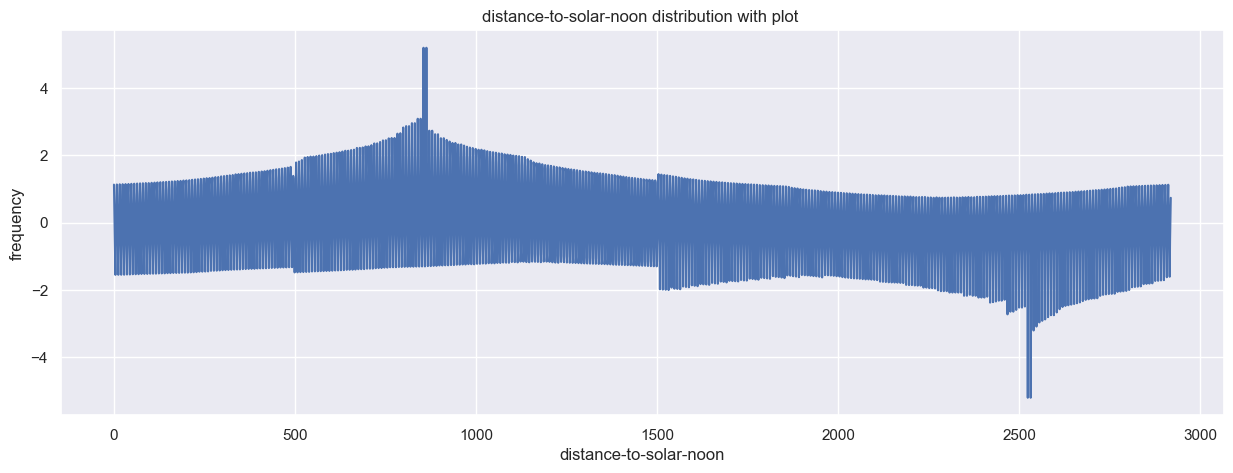

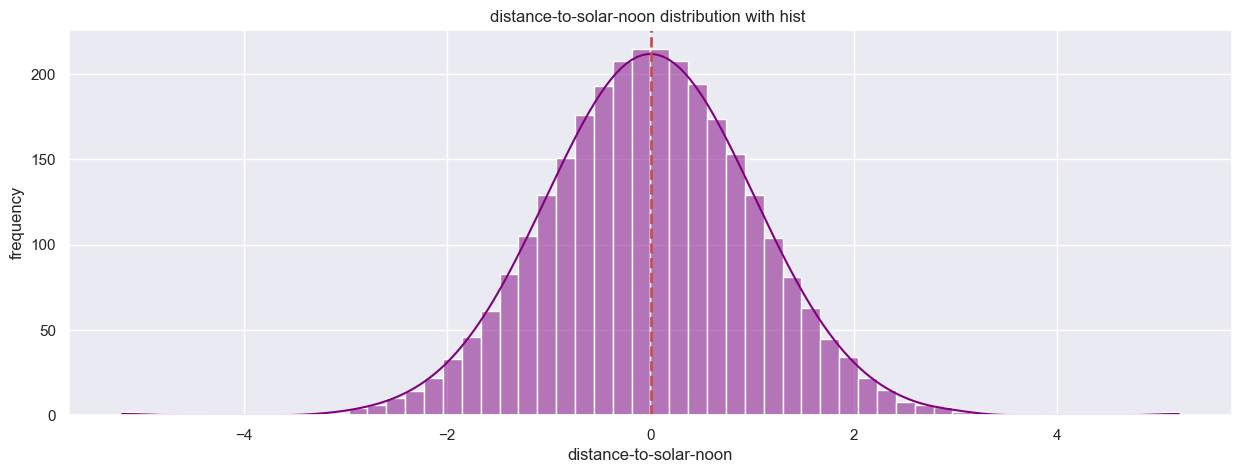

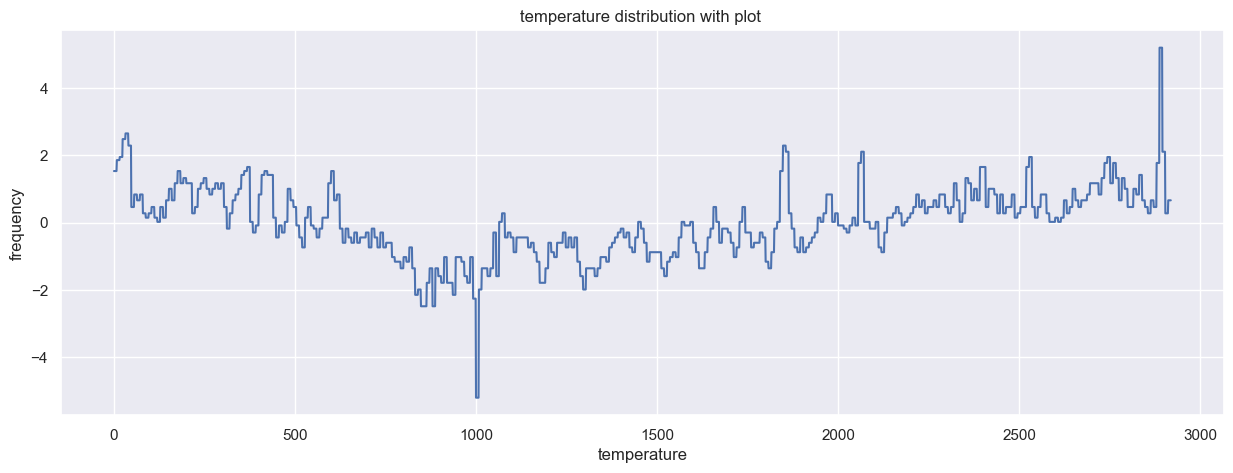

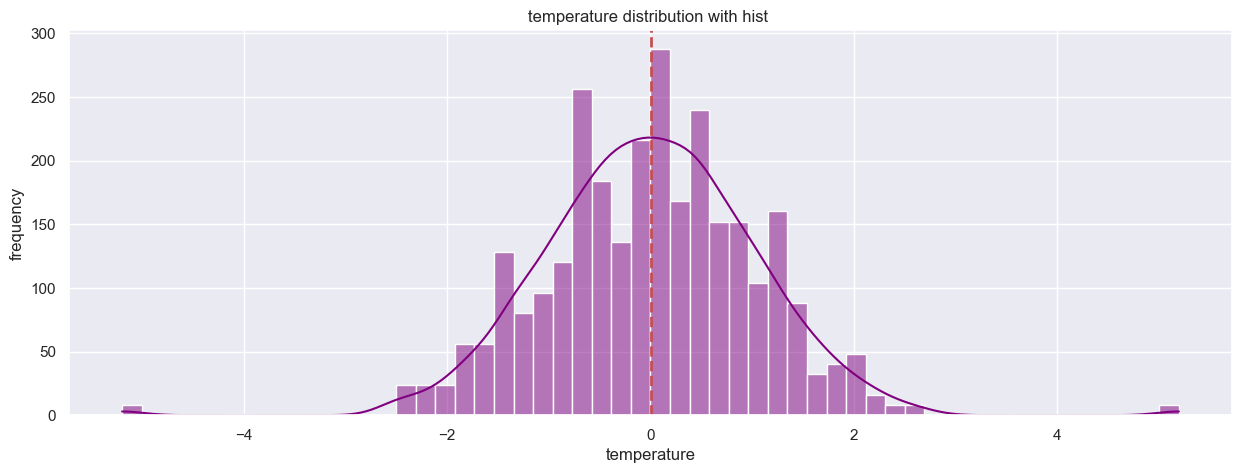

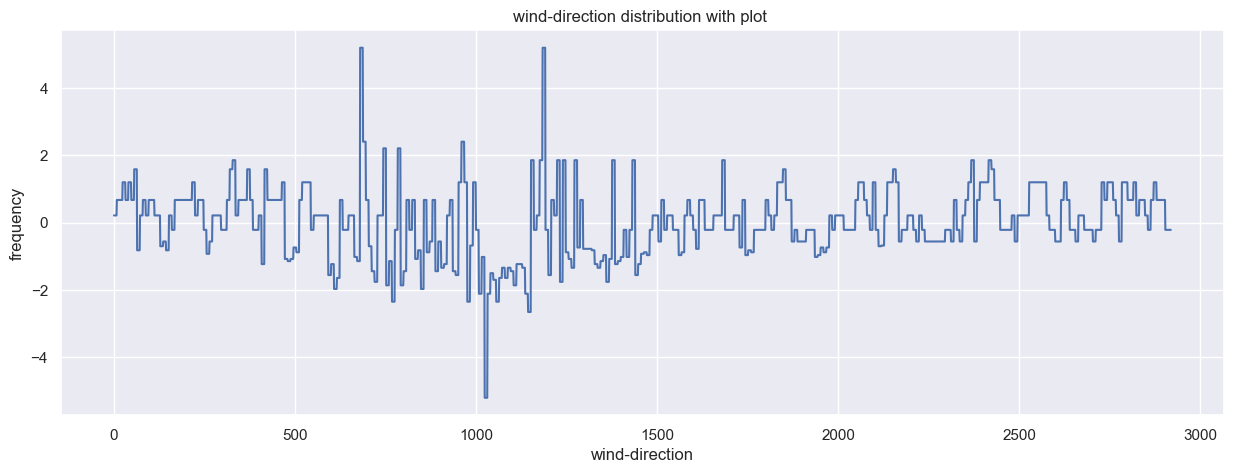

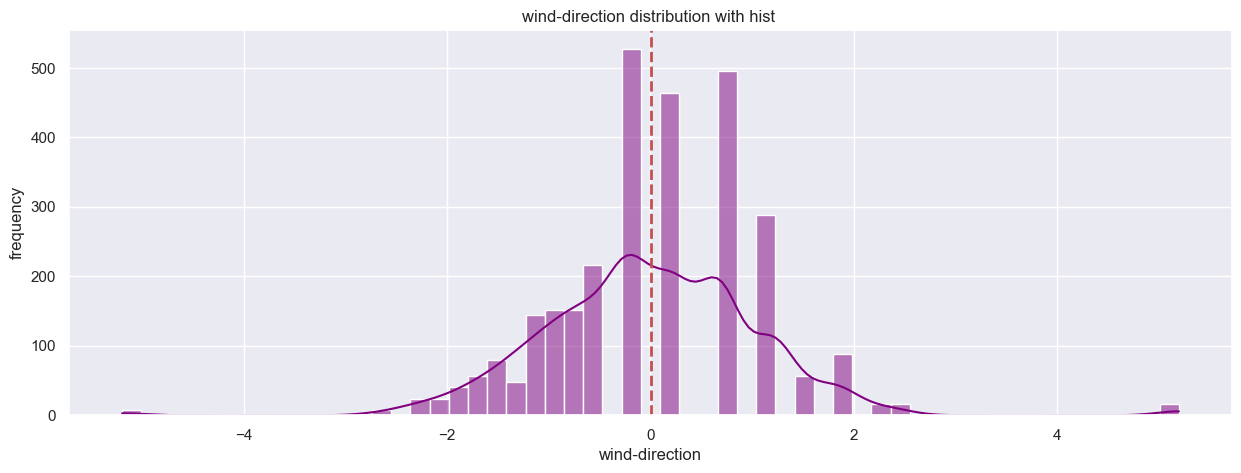

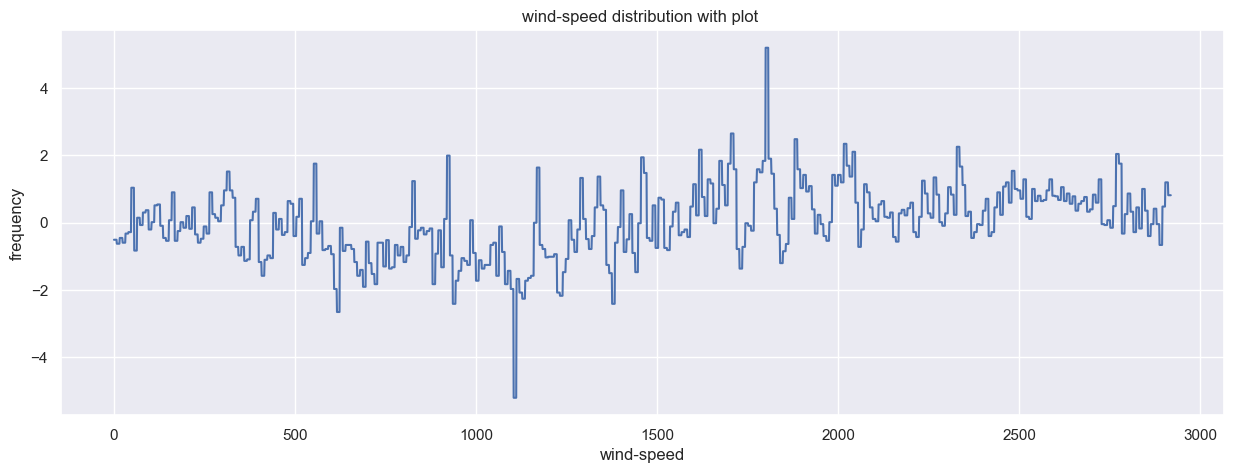

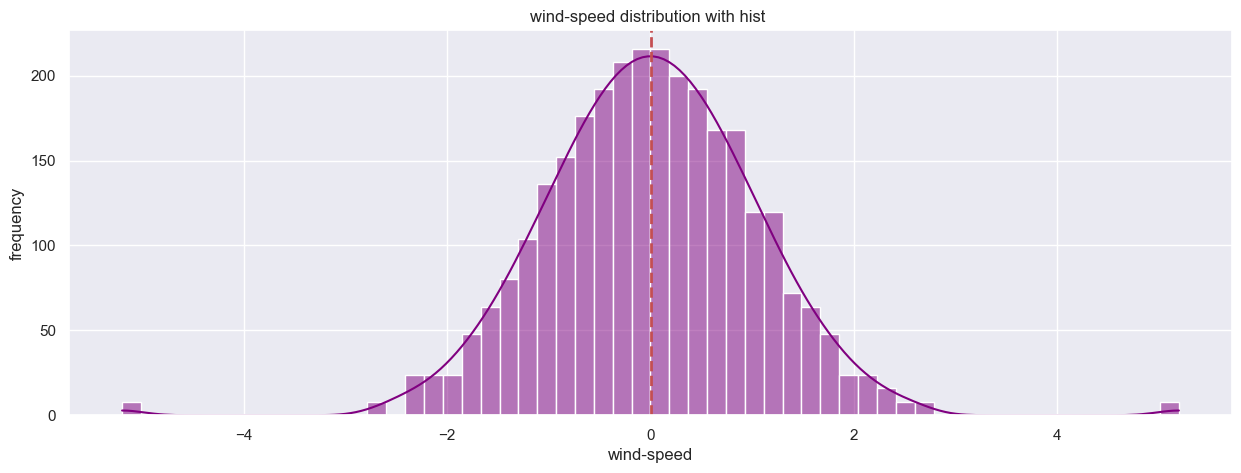

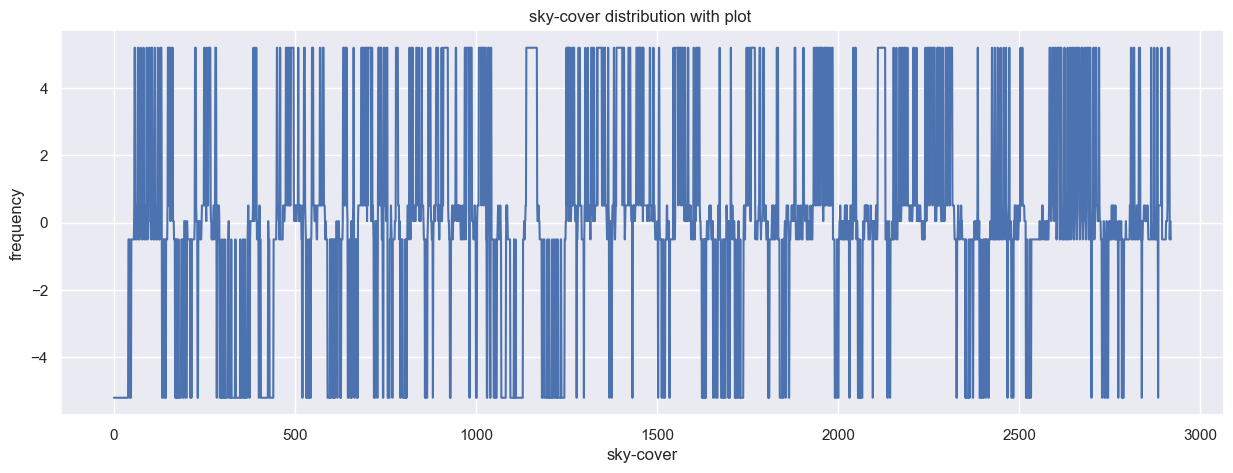

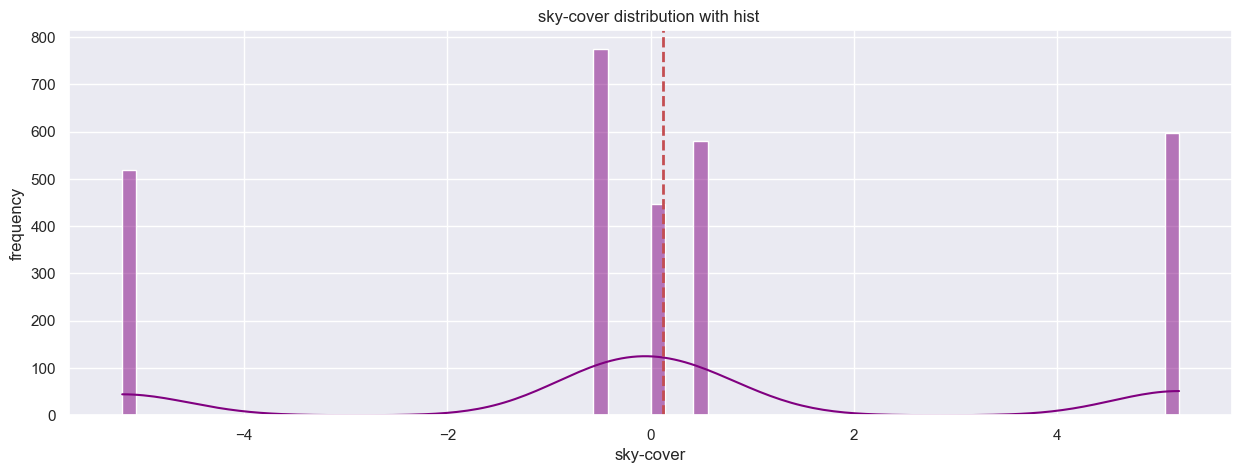

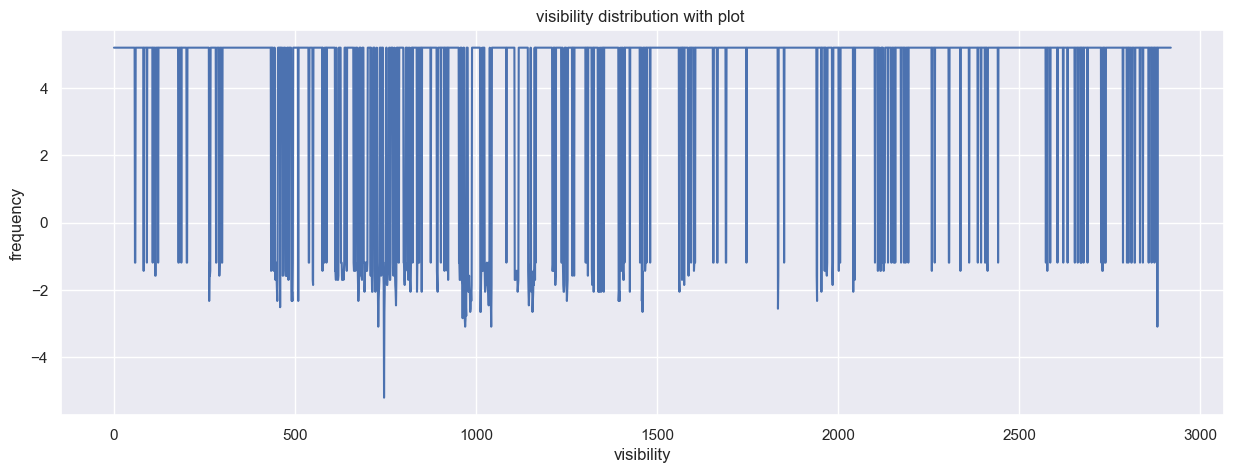

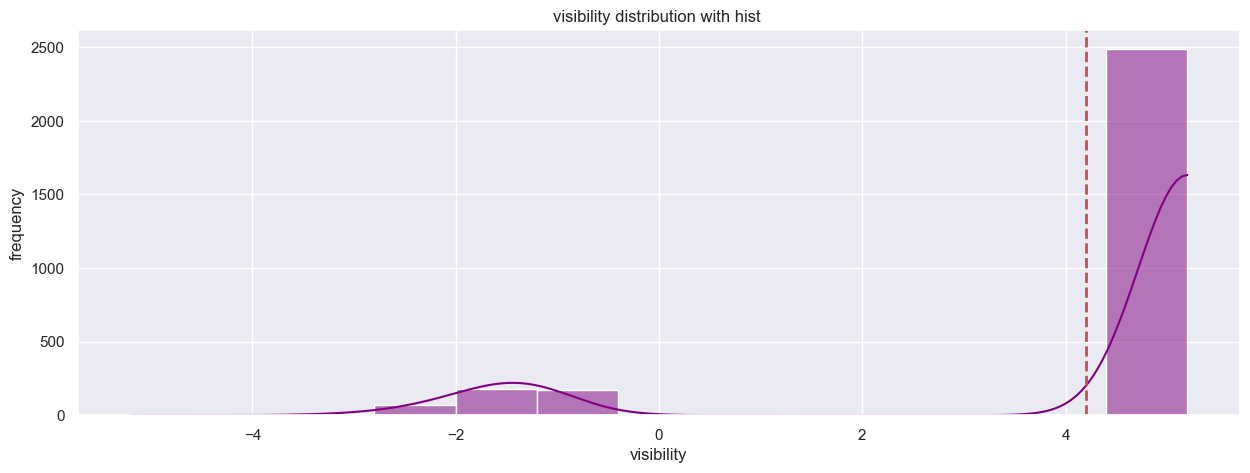

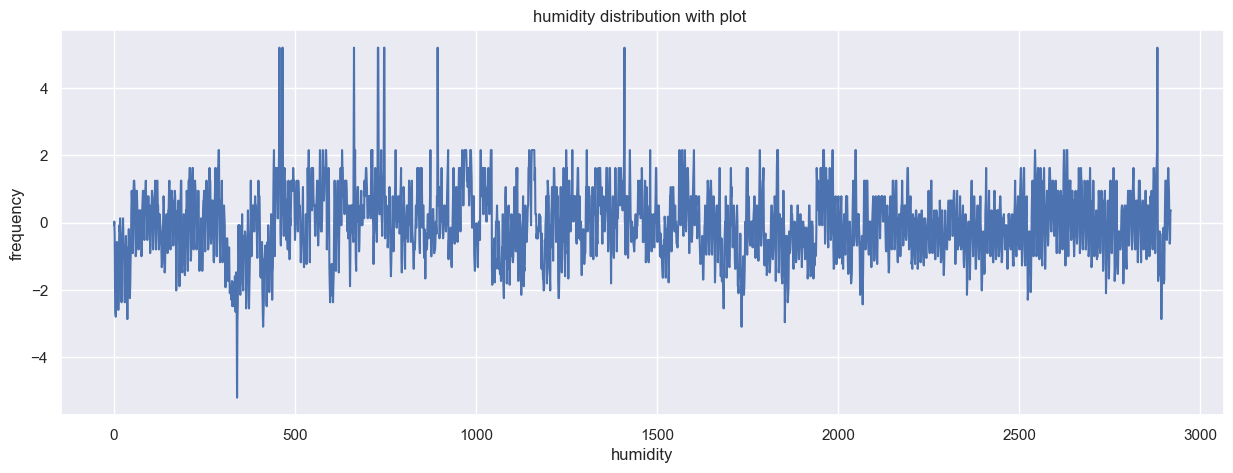

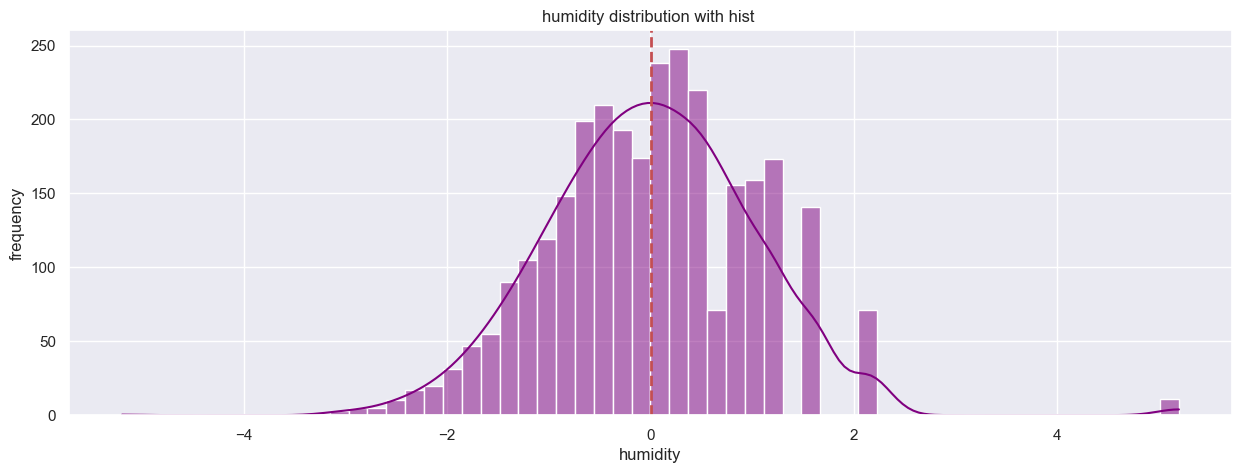

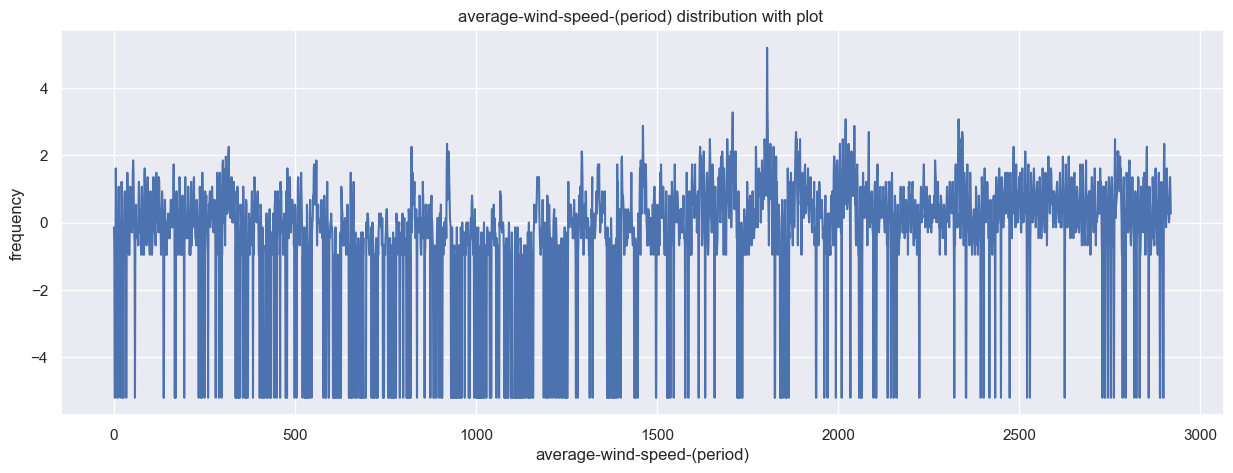

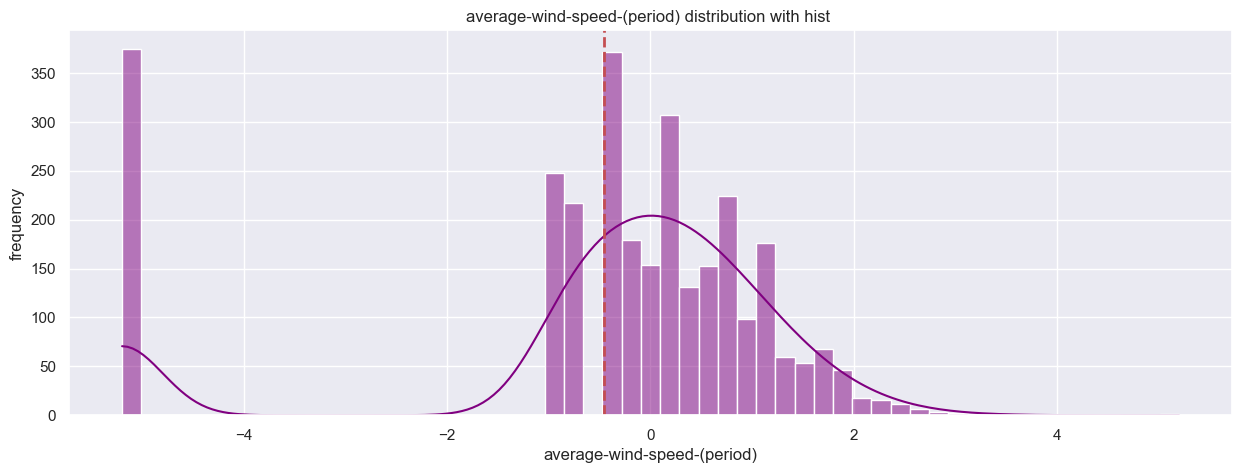

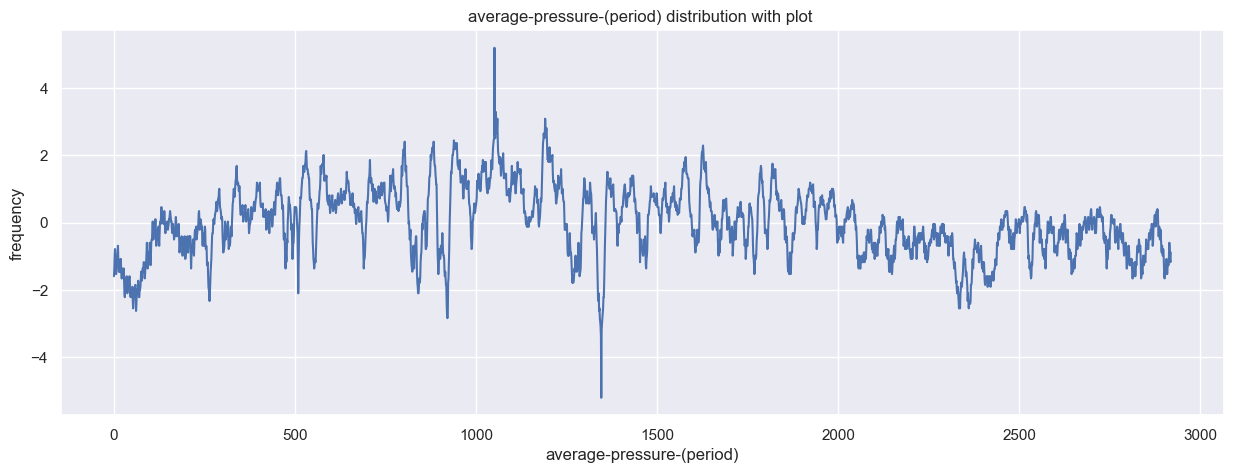

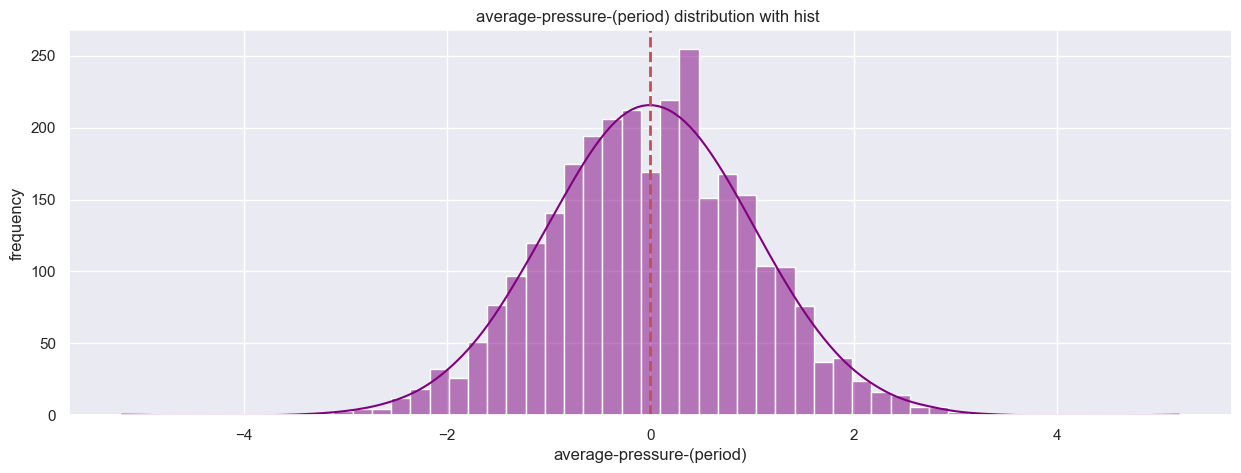

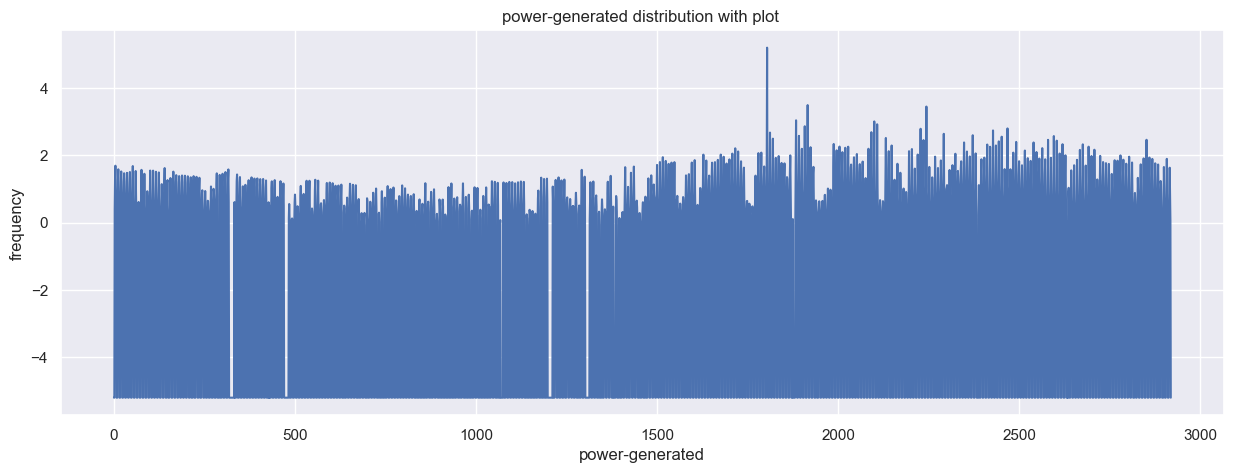

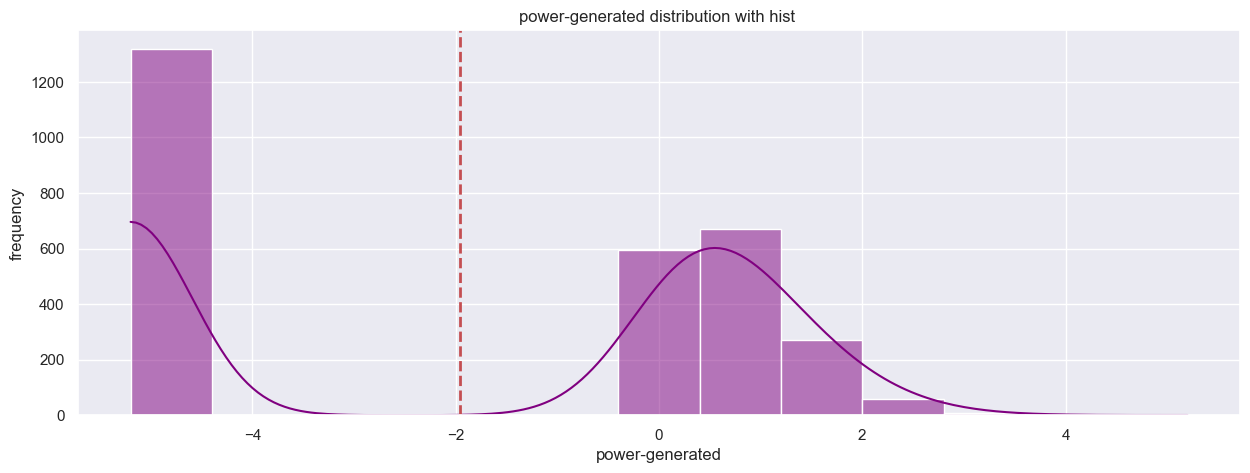

In [18]:
for col in num_cols:
    plot(col)
    plot_hist(col)
plt.show()

In [19]:
solar_data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [20]:
target=solar_data[['power-generated']]
features=solar_data.drop('power-generated',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=.2,random_state=21)
log_model= LogisticRegression()

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_model = LinearRegression()

# Fit the model
lin_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred=lin_model.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.6992399452236837

In [24]:
lin_model.coef_

array([[-2.14911174, -0.1256869 , -0.00804266, -0.06557361,  0.02018488,
        -0.09497542, -0.53703846,  0.05001347,  0.05182388]])

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost_model = GradientBoostingRegressor()

# Fit the model
gradboost_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
r2_score(y_test,y_pred)

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.6992399452236837